# CPE 490 590 
# Hierarchical Clustering
## Author: Rahul Bhadani

In [2]:
!pip install squarify

In [14]:
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
%matplotlib inline
import squarify                   ## for Treemaps

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Load the dataset

In [15]:
df = pd.read_csv('./Dataset/Mall_Customer/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Checking the shape of the dataset, rows, columns, duplicate entries & missing values


In [16]:
print('Number of records (rows) in the dataset are: {}'.format(df.shape[0]))
print('Number of features (columns) in the dataset are: {}'.format(df.shape[1]))
print('Number of duplicate entries in the dataset are: {}'.format(df.duplicated().sum()))
print('Number of missing values in the dataset are: {}'.format(sum(df.isna().sum())))


Number of records (rows) in the dataset are: 200
Number of features (columns) in the dataset are: 5
Number of duplicate entries in the dataset are: 0
Number of missing values in the dataset are: 0


Our dataset is clean. It has no duplicate values and no missing values.
The dataset appears to be pretty small with just 200 rows and just 4 columns, although it is a shopping mall dataset (which typically have hundreds and thousands of records).

## Rename some variables for easy access

In [17]:
df.rename(columns = {'Annual Income (k$)' : 'Income(k$/yr)', 'Spending Score (1-100)' : 'SpendScore(1-100)'}, inplace=True)

## Drop CustomerID variable, as it is redundant in our analysis

df = df.drop(columns=['CustomerID'])

print(df.columns)  ## Check the column names
df.head()

Index(['Gender', 'Age', 'Income(k$/yr)', 'SpendScore(1-100)'], dtype='object')


,Gender,Age,Income(k$/yr),SpendScore(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Some analysis

/tmp/ipykernel_18361/3705785364.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


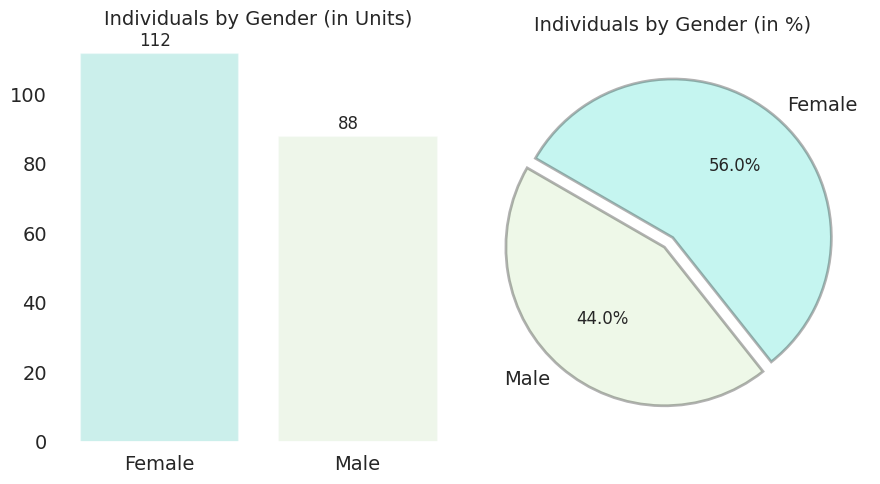

In [18]:

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(9,5))
my_pal = ('#40E0D0', '#c7e9b4')
my_xpl = [0.0, 0.08]

## Total Individuals by Gender (in Units)
plt.subplot(1,2,1)
plt.title('Individuals by Gender (in Units)', fontsize=14)
ax = sns.countplot(x="Gender", data=df, palette=my_pal, order=df['Gender'].value_counts().index, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))
plt.xlabel(None)
plt.ylabel(None)

## Total Individuals by Gender (in %)
plt.subplot(1,2,2)
plt.title('Individuals by Gender (in %)',fontsize=14)
df['Gender'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

## patterns and trends in the numerical variables

/tmp/ipykernel_18361/3697146222.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 1)


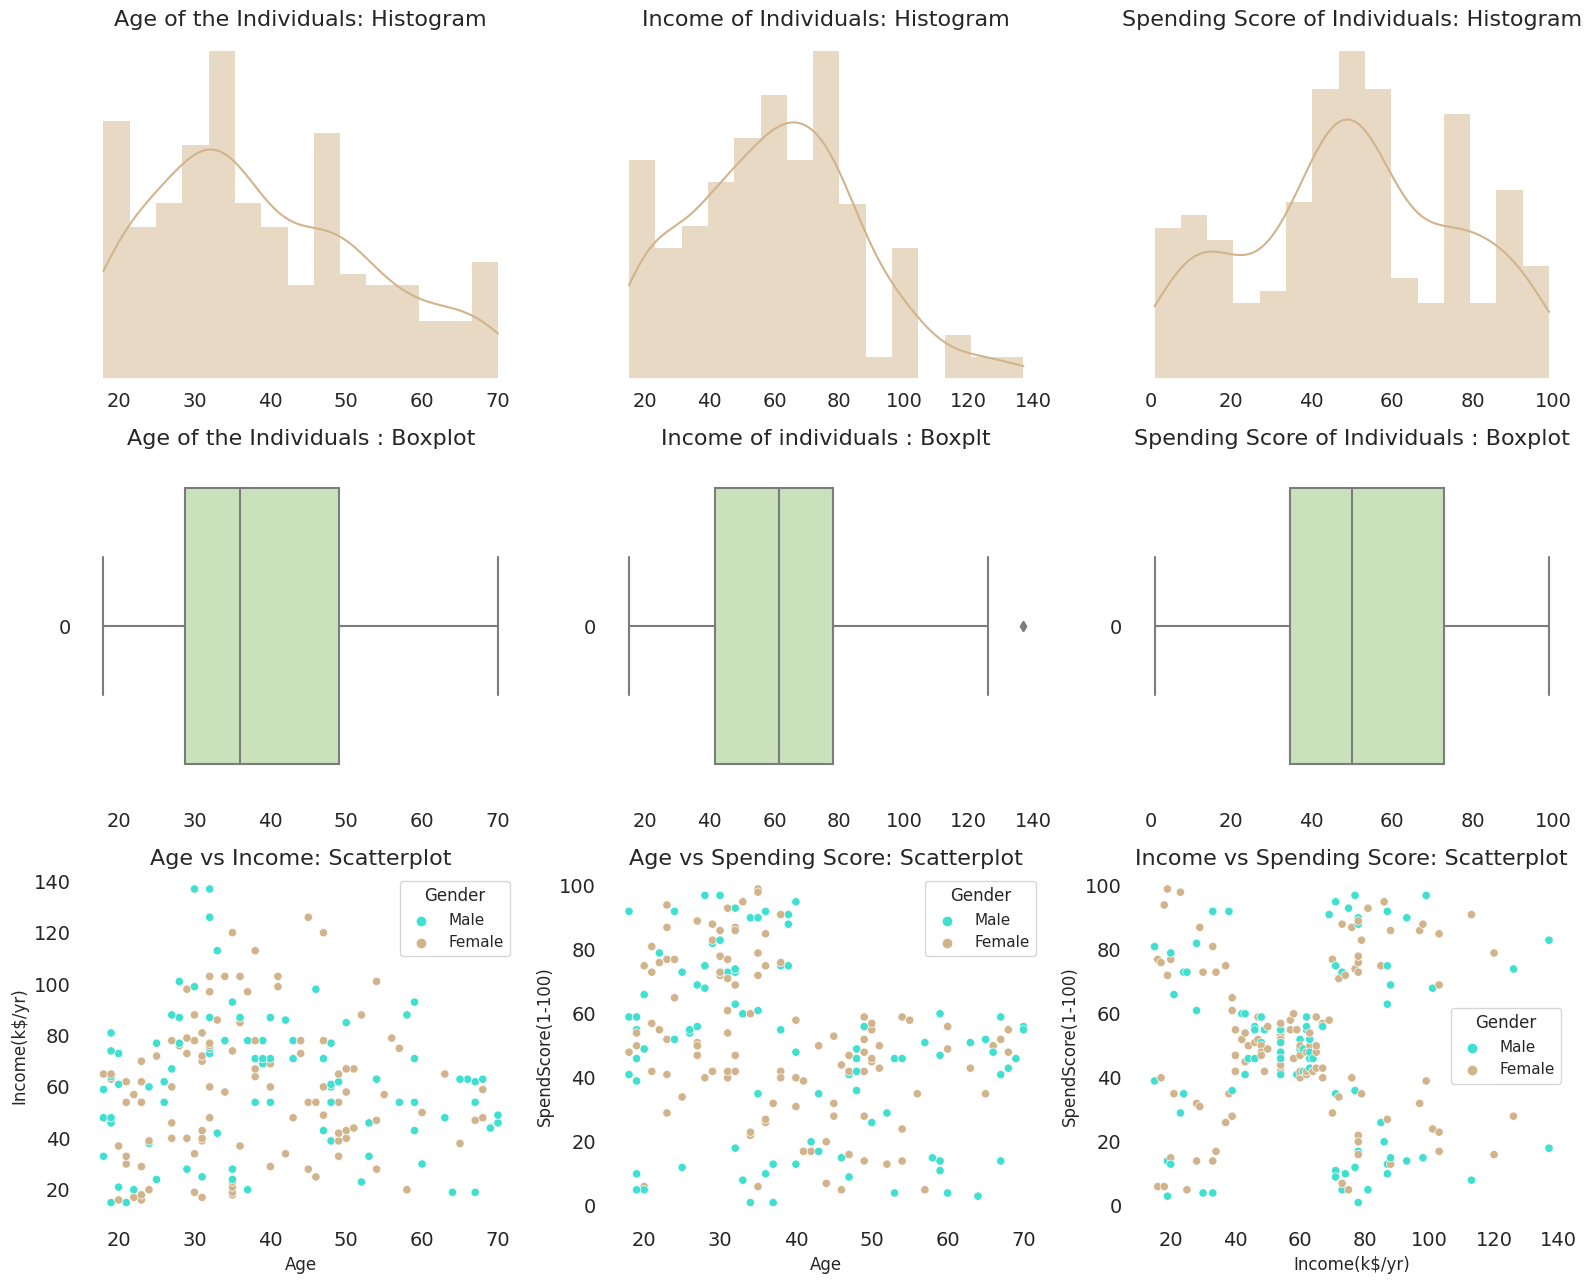

In [20]:
plt.subplots(figsize=(16,13))

# Plot 1: Age Histogram
plt.subplot(3, 3, 1)
plt.title('Age of the Individuals: Histogram', fontsize=16)
sns.histplot(df['Age'], color='#D2B48C', bins=15, kde=True, stat="density", linewidth=0)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

# Plot 2: Income Histogram
plt.subplot(3, 3, 2)
plt.title('Income of Individuals: Histogram', fontsize=16)
sns.histplot(df['Income(k$/yr)'], color='#D2B48C', bins=15, kde=True, stat="density", linewidth=0)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

# Plot 3: Spending Score Histogram
plt.subplot(3, 3, 3)
plt.title('Spending Score of Individuals: Histogram', fontsize=16)
sns.histplot(df['SpendScore(1-100)'], color='#D2B48C', bins=15, kde=True, stat="density", linewidth=0)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,4)
plt.title('Age of the Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Age'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,5)
plt.title('Income of individuals : Boxplt', fontsize=16)
sns.boxplot(df['Income(k$/yr)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,6)
plt.title('Spending Score of Individuals : Boxplot', fontsize=16)
sns.boxplot(df['SpendScore(1-100)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,7)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Income(k$/yr)', hue='Gender', palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,8)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,9)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Income(k$/yr)', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.show()

## Let's get features

In [21]:
X = df[['Income(k$/yr)', 'SpendScore(1-100)']].copy()
print(X.head(5))

   Income(k$/yr)  SpendScore(1-100)
0             15                 39
1             15                 81
2             16                  6
3             16                 77
4             17                 40


## Let's start the Hierarchial analysis by normalizing the data and 
## building a dataframe for analysis

In [22]:
norm = MinMaxScaler()

X_Hierar = norm.fit_transform(X)
X_Hierar = pd.DataFrame(X_Hierar, columns=X.columns)
print(X_Hierar.head(5))

   Income(k$/yr)  SpendScore(1-100)
0       0.000000           0.387755
1       0.000000           0.816327
2       0.008197           0.051020
3       0.008197           0.775510
4       0.016393           0.397959


## Build dendrogram to find out the optimal number of clusters


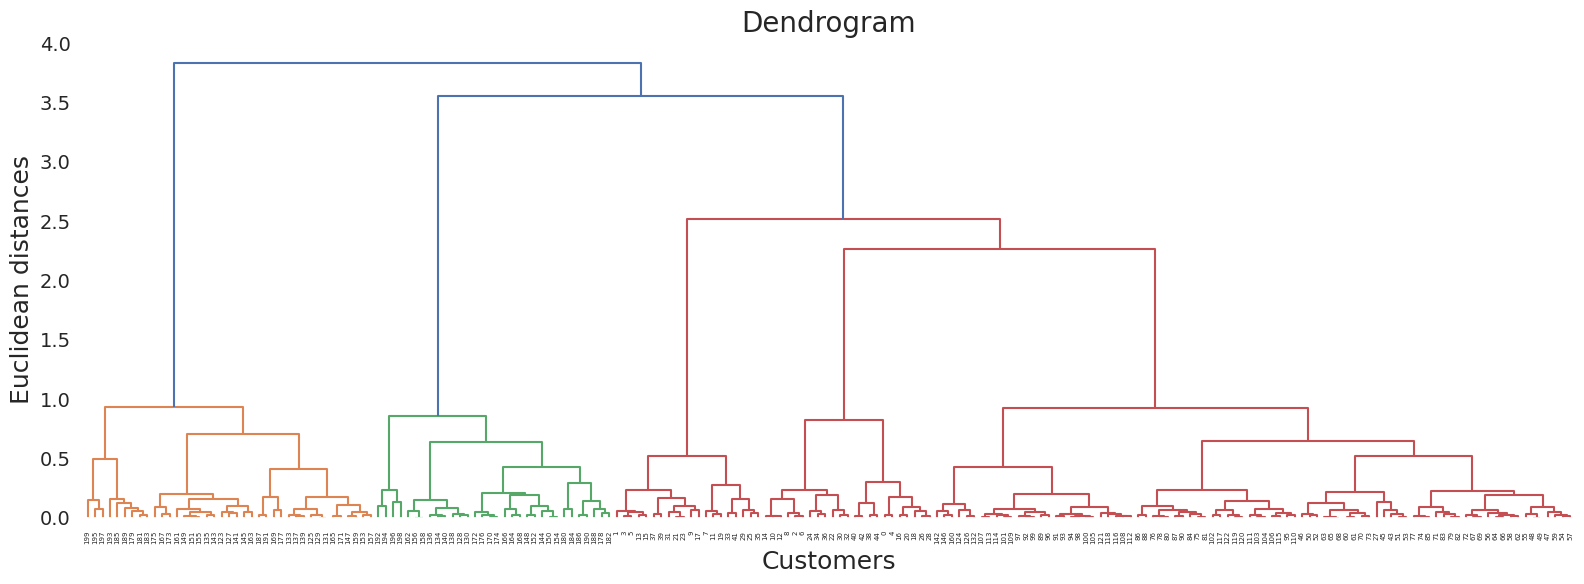

In [23]:

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

## Draw the threshold level to identify the ideal number of clusters


## We will use Ward Method for Hierarchical Clustering Dendogram
### Linkage Matrix:
- The linkage matrix contains information about the process of building a tree (dendrogram) during hierarchical clustering.
- It encodes how data points (or clusters) are grouped together at each step of the clustering process.
- The matrix has dimensions (n-1) x 4, where n is the number of data points.
- Each row corresponds to a merge operation, combining two clusters into a larger cluster.
- The columns in each row represent:
- *Cluster 1 Index*: The index of the first cluster being merged.
- *Cluster 2 Index*: The index of the second cluster being merged.
- *Distance*: The distance between Cluster 1 and Cluster 2 (based on a chosen linkage method).
- *Number of Original Observations*: The total number of data points in the newly formed cluster.
### The linkage matrix is used to construct the dendrogram, which visually represents the clustering hierarchy.
### Linkage Methods:
#### Different linkage methods determine how the distance between clusters is calculated during merging:
- *Single Linkage*: Minimum pairwise distance between any two points in the clusters.
- *Complete Linkage*: Maximum pairwise distance between any two points in the clusters.
- *Average Linkage*: Average pairwise distance between points in the clusters.
- *Ward’s Method*: Minimizes the variance of distances when merging clusters.
- *Centroid Method*: Distance based on centroids of clusters.
### The choice of linkage method affects the resulting dendrogram and cluster structure.
### Interpretation:
- The linkage matrix helps us understand the order in which clusters were merged.
- By analyzing the distances and the number of original observations, we can identify significant clusters.
- The dendrogram visually represents this hierarchy, showing how data points are grouped together.

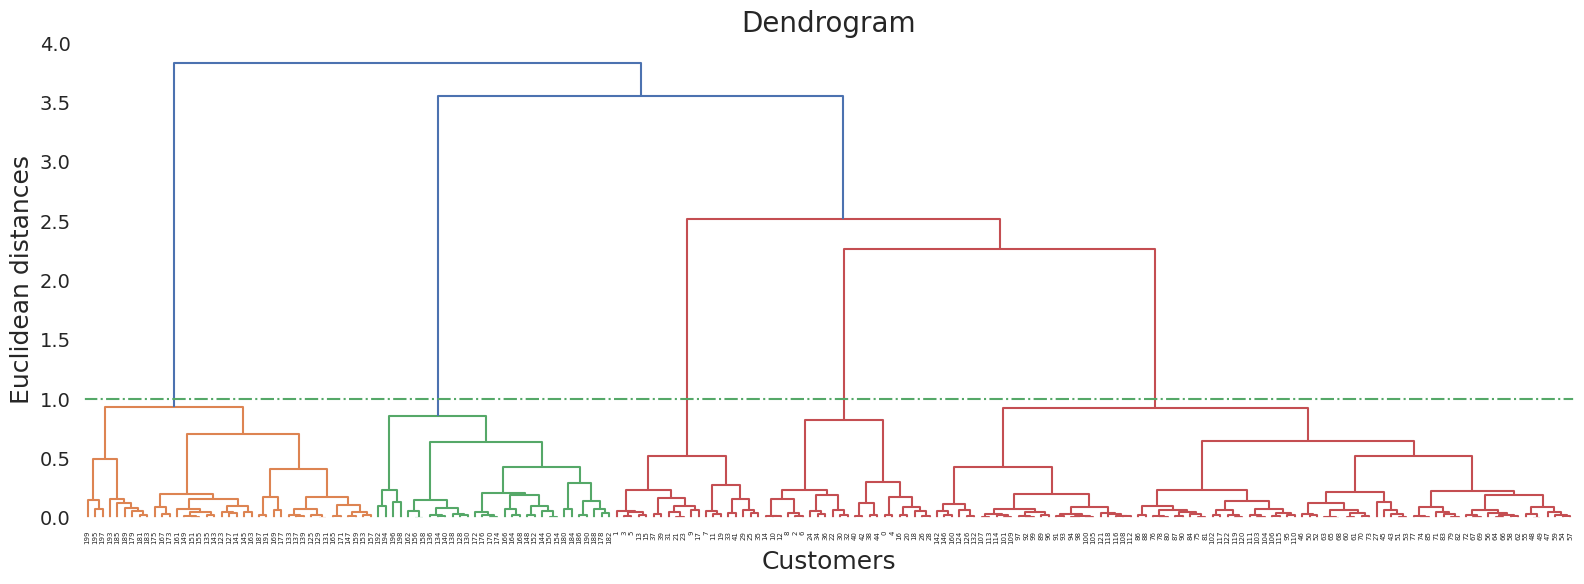

In [25]:
plt.figure(figsize=(16,6))

#  computes the linkage matrix based on the input data X_Hierar using the Ward method.
# The Ward method minimizes the variance of distances between clusters when merging them.
# The resulting linkage matrix contains information about how the data points are grouped together.

dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')

plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

### The threshold line intersects 5 vertical lines, hence we can conclude that the number of clusters we can have as 5.

## Model fitting with 5 clusters


In [27]:

clusters = AgglomerativeClustering(n_clusters=5,  linkage='ward')
y_kmeans = clusters.fit_predict(X_Hierar)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

## Create a New Dataframe with an additional cluster column


In [28]:
df_Hierar = df.copy()   ## making a copy of original dataframe
df_Hierar['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Hierar.head(5))

   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        4
1    Male   21             15                 81        3
2  Female   20             16                  6        4
3  Female   23             16                 77        3
4  Female   31             17                 40        4


## Visualise the new dataframe with cluster numbers through scatterplot


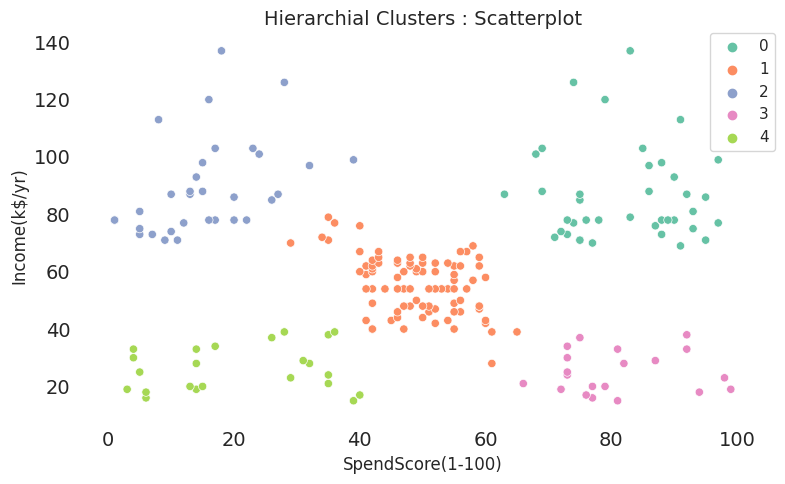

In [29]:
plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()